In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simulate as sim
import kf

from scipy.stats import norm
from matplotlib import cm
from importlib import reload
from scipy.optimize import fmin, minimize

# Simulating Data

In [2]:
# S0 = 149.54
S0 = 100
T = 30
# r = 0.0245
r = 0.2
q = 0
N = 10000

In [3]:
# true_params = [r, 3.37776282, 0.10125896, -0.32429652, -0.24495863, 0.15412752]
true_params = [r, 2.2, 0.01, 0.29, -0.3, 0.02]

In [4]:
y = sim.simulate_heston_state(true_params, S0, N=N) 

### simulate path and ekf generated path

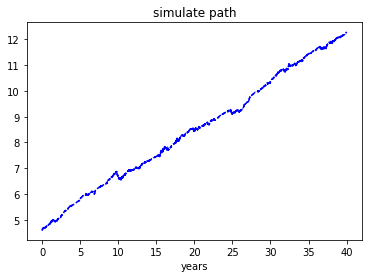

In [5]:
years = np.arange(y.shape[-1]-1) * (1/250)
plt.plot(years, y[0,1:].T, 'b--')
plt.title('simulate path')
plt.xlabel('years')
plt.show()

# neg vol: [[406]]


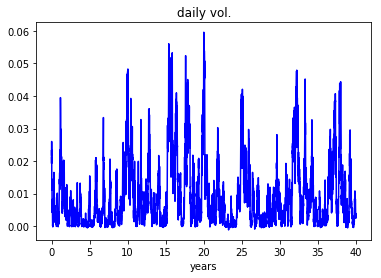

In [6]:
print("# neg vol:", sum(y[1,1:].T<0))
plt.plot(years, y[1,1:].T, 'b-')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# EKF and Parameter Estimation

In [7]:
reload(kf)

<module 'kf' from '/Users/Mason/Desktop/Columbia/computational-methods-in-finance/cfinance-filtering/kf.py'>

In [8]:
ekf = kf.EKFHeston(np.array(y[0, :])[0])

In [9]:
init_params = [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]

### Initial path vs. true path

In [10]:
y_, vol_ = ekf.filter(np.array(y[0, :])[0], init_params)

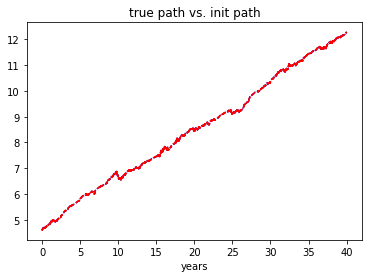

In [11]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[406]]
# neg vol (pred): 0


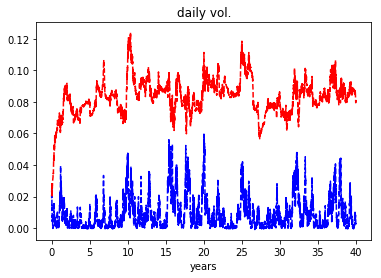

In [12]:
print("# neg vol:", sum(y[1,1:].T<0))
print("# neg vol (pred):", sum(vol_<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, vol_.T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()

# Optimization

### Note: Optimization takes time..., run for longer iterations

In [13]:
print("Init params: {}".format(init_params))
print("True Params: {}".format(true_params))

Init params: [0.6, 1.1, 0.03, 0.35, -0.4, 0.035]
True Params: [0.2, 2.2, 0.01, 0.29, -0.3, 0.02]


In [15]:
params_opt = ekf.optimize(init_params, maxiter=100)

i: 1
x_i: [ 0.615    1.1275   0.03075  0.35875 -0.41     0.0315 ]
f_i: -8.571816120708895
i: 2
x_i: [ 0.615    1.1275   0.03075  0.35875 -0.41     0.0315 ]
f_i: -8.571816120708895
i: 3
x_i: [ 0.615    1.1275   0.03075  0.35875 -0.41     0.0315 ]
f_i: -8.571816120708895
i: 4
x_i: [ 0.615    1.1275   0.03075  0.35875 -0.41     0.0315 ]
f_i: -8.571816120708895
i: 5
x_i: [ 0.615    1.1275   0.03075  0.35875 -0.41     0.0315 ]
f_i: -8.571816120708895
i: 6
x_i: [ 0.58814815  1.1162963   0.03180556  0.39148148 -0.39740741  0.02946914]
f_i: -8.61961724055107
i: 7
x_i: [ 0.58814815  1.1162963   0.03180556  0.39148148 -0.39740741  0.02946914]
f_i: -8.61961724055107
i: 8
x_i: [ 0.6387963   1.06384259  0.03173611  0.3906713  -0.42314815  0.02685494]
f_i: -8.675347665311788
i: 9
x_i: [ 0.6387963   1.06384259  0.03173611  0.3906713  -0.42314815  0.02685494]
f_i: -8.675347665311788
i: 10
x_i: [ 0.62592593  1.12851852  0.03097222  0.40217593 -0.41296296  0.02259877]
f_i: -8.779848883568055
i: 11
x_i: 

f_i: -9.108546433010973
i: 78
x_i: [ 0.21380205  1.25856821  0.03730847  0.68083499 -0.20210445  0.00922128]
f_i: -9.108551079361382
i: 79
x_i: [ 0.21380205  1.25856821  0.03730847  0.68083499 -0.20210445  0.00922128]
f_i: -9.108551079361382
i: 80
x_i: [ 0.20628646  1.26050836  0.0373981   0.68419343 -0.19884494  0.00926857]
f_i: -9.108551759152808
i: 81
x_i: [ 0.20945556  1.25952967  0.03735543  0.68322673 -0.19965239  0.00921453]
f_i: -9.10855372479378
i: 82
x_i: [ 0.21313508  1.25887767  0.03731983  0.68098444 -0.20169072  0.00925829]
f_i: -9.108555827988956
i: 83
x_i: [ 0.21313508  1.25887767  0.03731983  0.68098444 -0.20169072  0.00925829]
f_i: -9.108555827988956
i: 84
x_i: [ 0.20739909  1.26081353  0.03737987  0.68362641 -0.19877788  0.0092471 ]
f_i: -9.10855735319915
i: 85
x_i: [ 0.21201671  1.25864995  0.0372898   0.68186497 -0.20066185  0.00925892]
f_i: -9.108557729211686
i: 86
x_i: [ 0.21154485  1.25925181  0.03732829  0.68189626 -0.20092873  0.00923343]
f_i: -9.1085581674437

### Parameter Selection

In [18]:
# def param_select(params1, params2, n_alphas=1000):
#     params1 = np.array(params1)
#     params2 = np.array(params2)
#     alphas = np.linspace(0, 1, n_alphas)
#     params = [a*params1+(1-a)*params2 for a in alphas]
#     objs = [wrap_heston_obj(p, *args) for p in params]
#     return objs

# Optimized plots

In [20]:
print("Optimal params: {}".format(params_opt))
print("True Params: {}".format(true_params))

Optimal params: [ 0.20972361  1.25994659  0.03734251  0.68266773 -0.19992555  0.00924713]
True Params: [0.2, 2.2, 0.01, 0.29, -0.3, 0.02]


In [21]:
y_, vol_ = ekf.filter(np.array(y[0, :])[0], init_params)

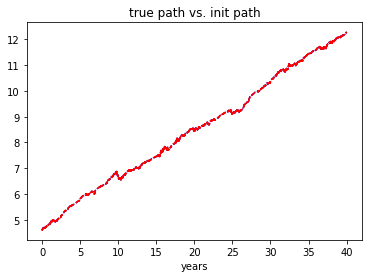

In [22]:
plt.plot(years, y[0,1:].T, 'b--')
plt.plot(years, y_, 'r--')
plt.title('true path vs. init path')
plt.xlabel('years')
plt.show()

# neg vol: [[406]]
# neg vol (pred): 0


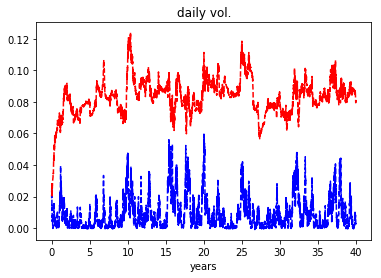

In [23]:
print("# neg vol:", sum(y[1,1:].T<0))
print("# neg vol (pred):", sum(vol_<0))
plt.plot(years, y[1,1:].T, 'b--')
plt.plot(years, vol_.T, 'r--')
plt.title('daily vol.')
plt.xlabel('years')
plt.show()